참고 사이트 : https://alphalog.co.kr/319

# 사전세팅

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 275.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 17.0 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
from IPython.display import display, Image
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import shutil
from google.colab import files

# Roboflow 코드

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="(your api key)")
project = rf.workspace("ballon-map-workspace").project("trash_balloon_detection_yolo")
version = project.version(1)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trash_Balloon_Detection_YOLO-1 in yolov9:: 100%|██████████| 2470/2470 [00:00<00:00, 4852.26it/s]


In [ ]:
# 데이터셋 위치 확인
print(f"Dataset downloaded to: {dataset.location}")

Dataset downloaded to: /content/Trash_Balloon_Detection_YOLO-1


In [ ]:
import os

In [ ]:
# YOLOv9 환경 설치는 YOLOv9의 공식 저장소를 이용하여 진행한다.
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q
%cd .

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 32.39 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
/content/yolov9


In [ ]:
# 현재 작업중인 디렉터리 확인
HOME = os.getcwd()
print(HOME)
print(f'{HOME}/weights')

/content/yolov9
/content/yolov9/weights


In [ ]:
# YAML 파일 설정(train, valid, test 이미지 데이터셋 경로 정도만 수정)
# test: /content/Trash_Balloon_Detection_YOLO-1/test/images
# train: /content/Trash_Balloon_Detection_YOLO-1/train/images
# val: /content/Trash_Balloon_Detection_YOLO-1/valid/images

cat: /root: Is a directory


In [ ]:
# 가중치 다운로드
!wget -P '/content/yolov9/weights' -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P '/content/yolov9/weights' -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P '/content/yolov9/weights' -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P '/content/yolov9/weights' -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
%cd ..
HOME = os.getcwd()
print(HOME)

# HOME 출력시 /content가 뜨는 시점에서 아래 코드를 그대로 적용해야함

/content
/content


In [ ]:
# YOLOv9 학습
# !yolo task=detect mode=train model=yolov9m.pt data=/content/Trash_Balloon_Detection_YOLO-1/data.yaml epochs=50 imgsz=640 plots=True

# %cd {HOME}/yolov9

# !python train.py \
# --batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
# --data {dataset.location}/data.yaml \
# --weights {HOME}/weights/gelan-c.pt \
# --cfg models/detect/gelan-c.yaml \
# --hyp hyp.scratch-high.yaml

!python yolov9/train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data Trash_Balloon_Detection_YOLO-1/data.yaml \
--weights yolov9/weights/gelan-c.pt \
--cfg yolov9/models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

train: weights=yolov9/weights/gelan-c.pt, cfg=yolov9/models/detect/gelan-c.yaml, data=Trash_Balloon_Detection_YOLO-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov9/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, cls_pw=1.0, dfl=1.5, obj_pw=1.0, iou_t=0.

# 훈련 결과 출력

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 작업디렉토리 확인
import os
HOME = os.getcwd()
print(HOME)

/content


/content


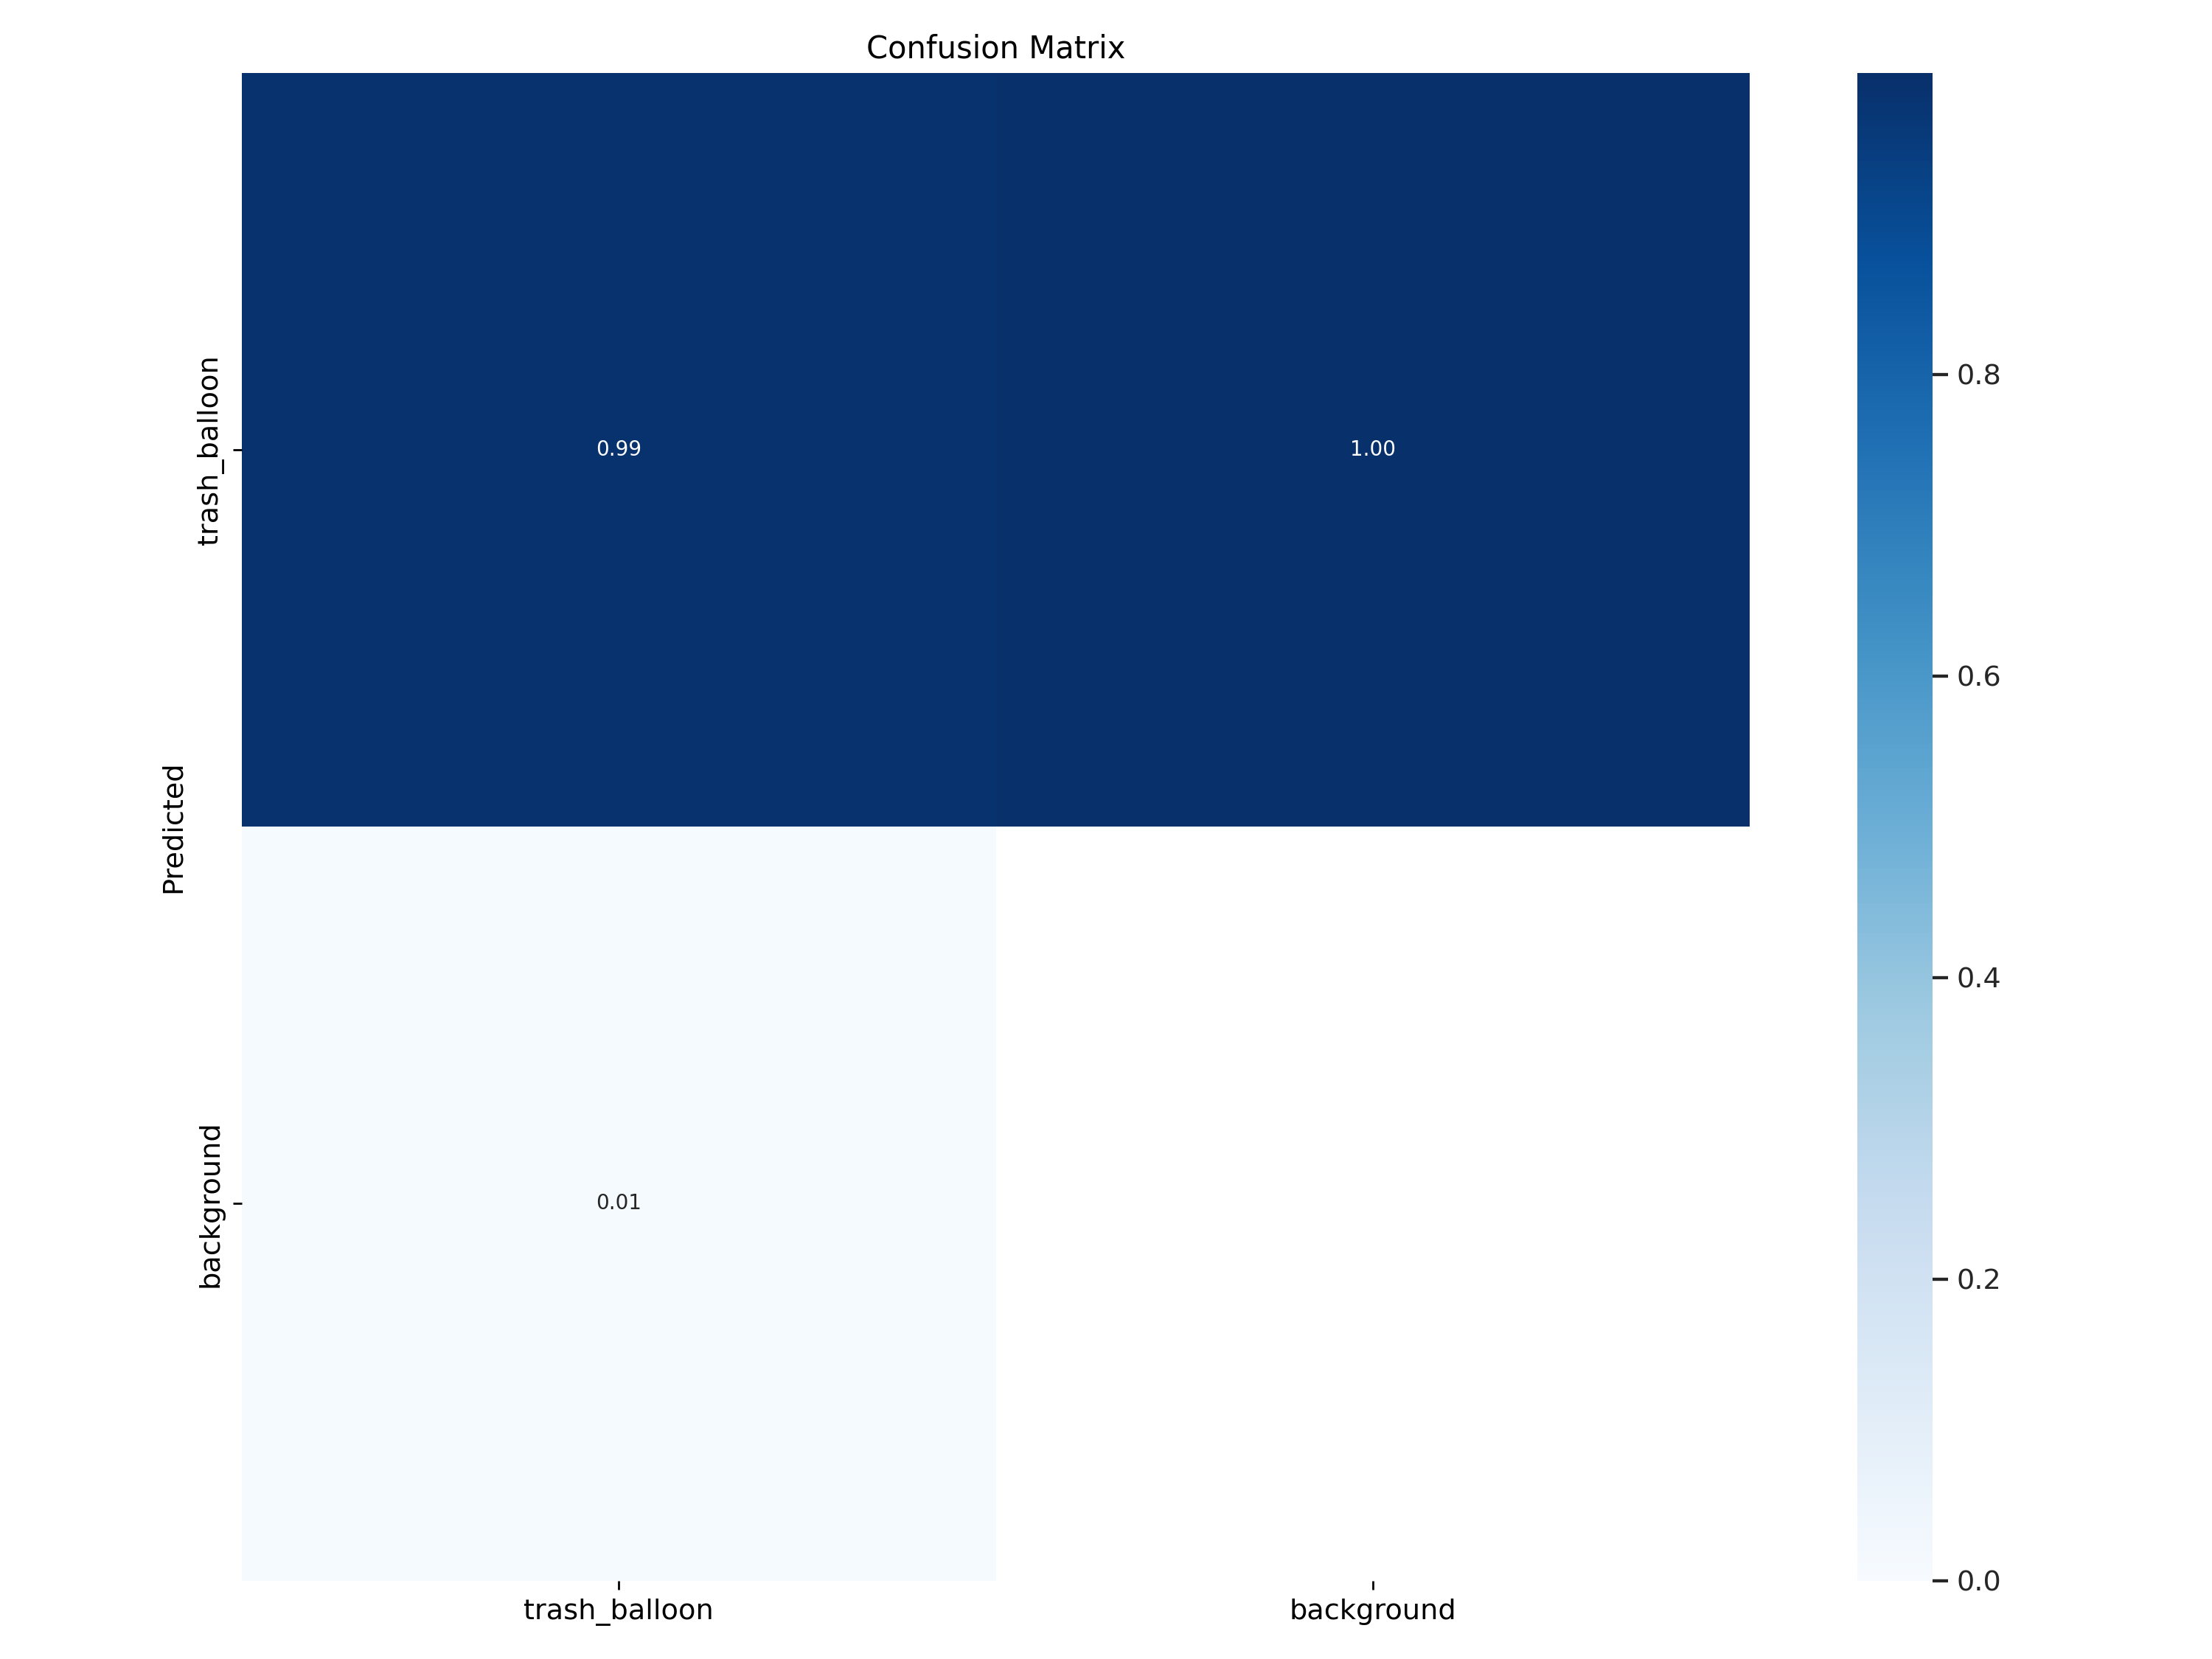

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/yolov9/runs/train/exp7/confusion_matrix.png', width=1000) # 수정 필요

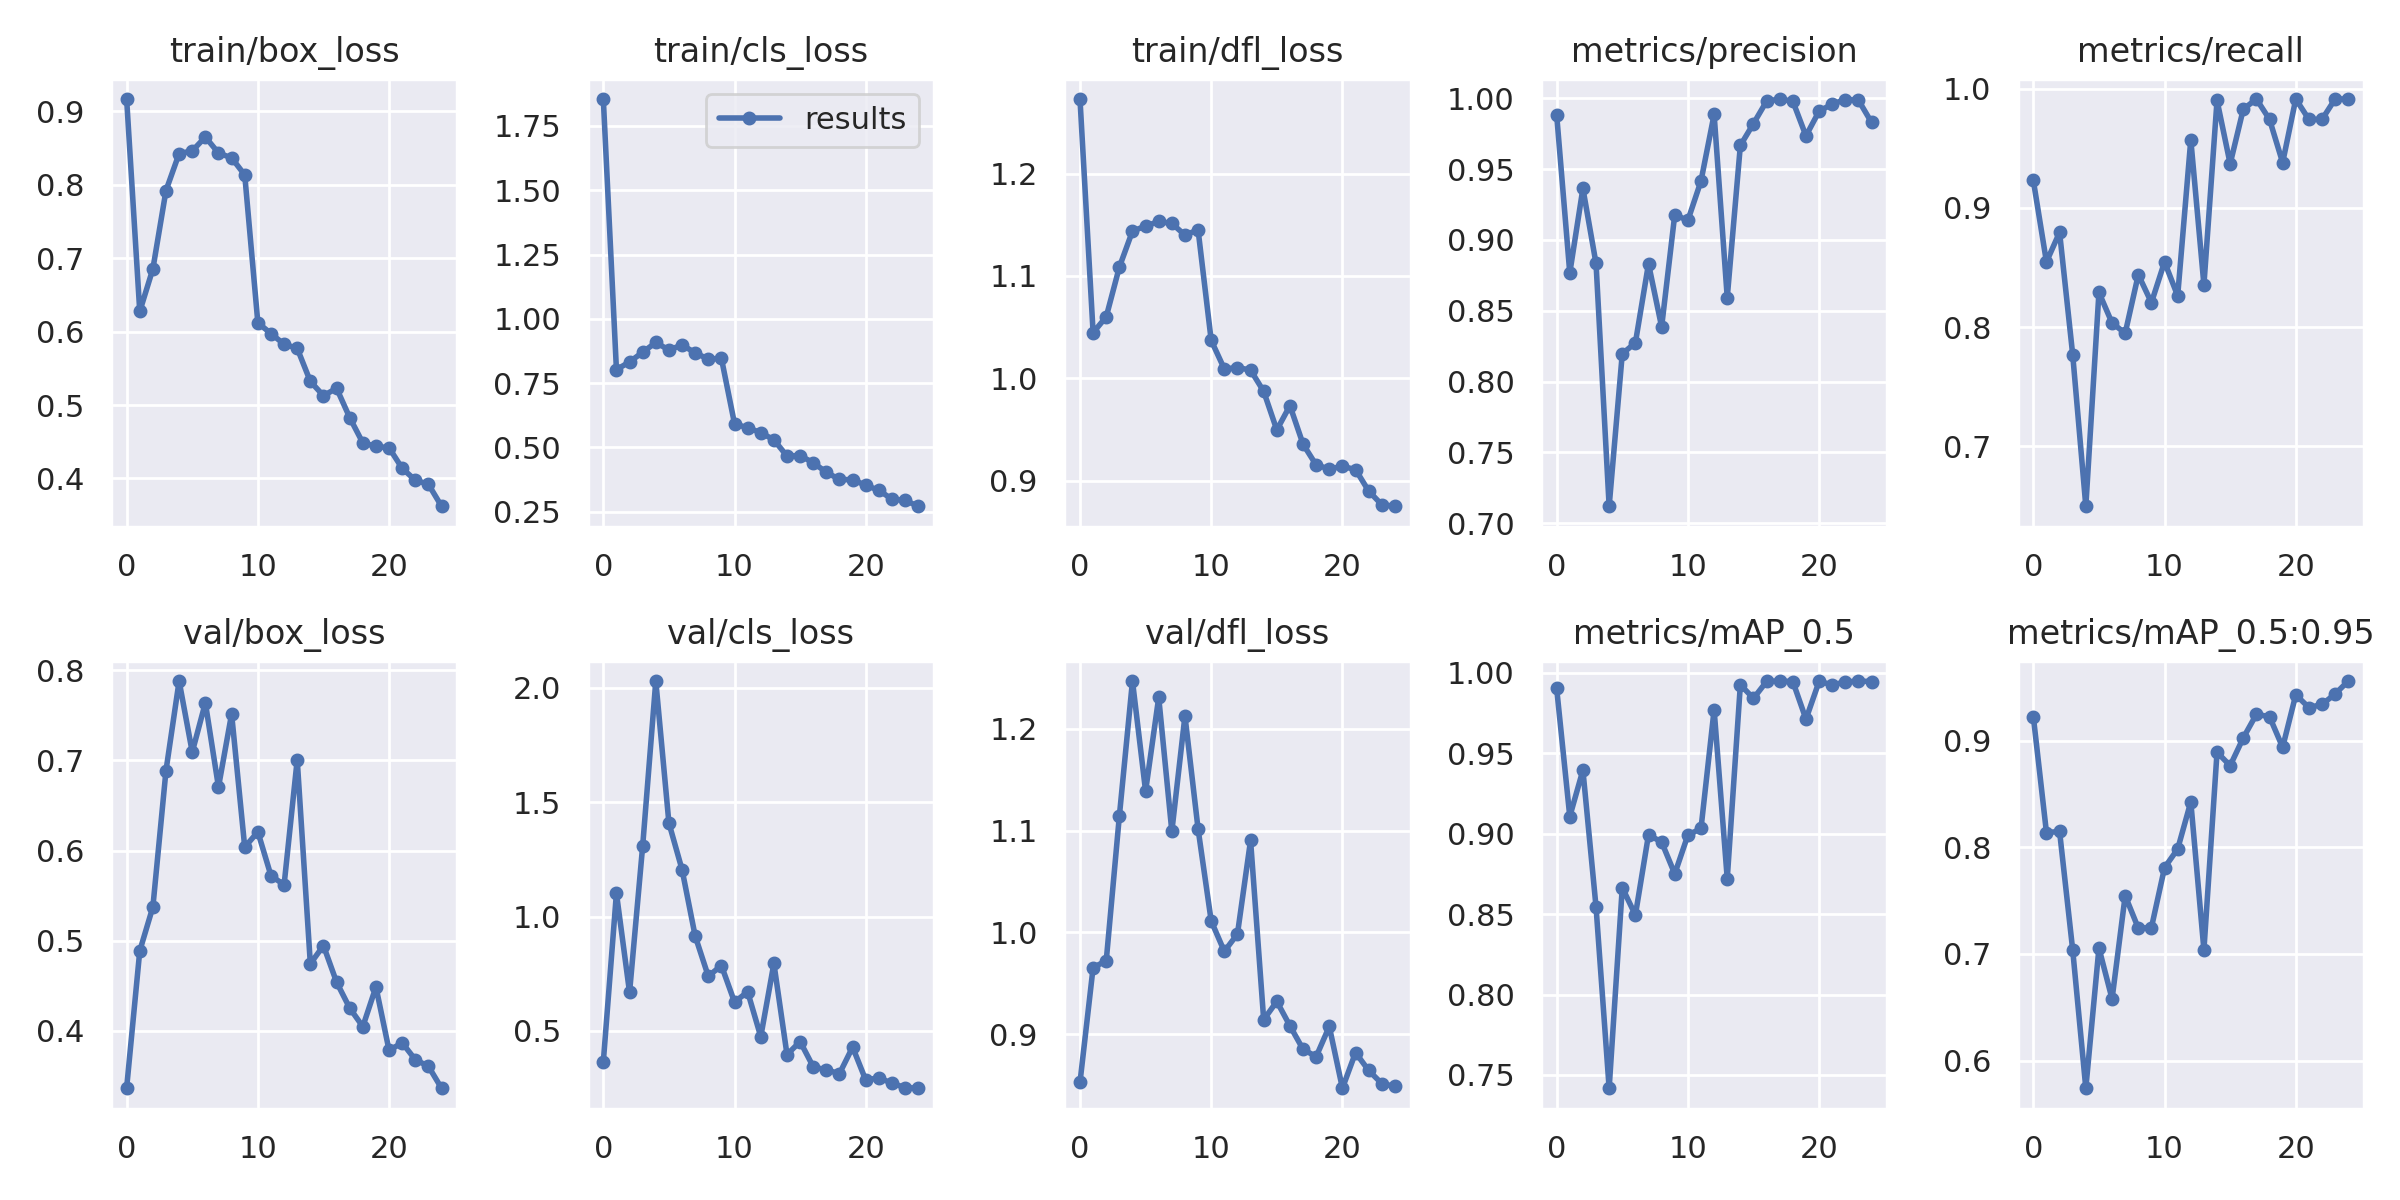

In [ ]:
# %cd {HOME}
Image(filename=f'{HOME}/yolov9/runs/train/exp7/results.png', width=1000)

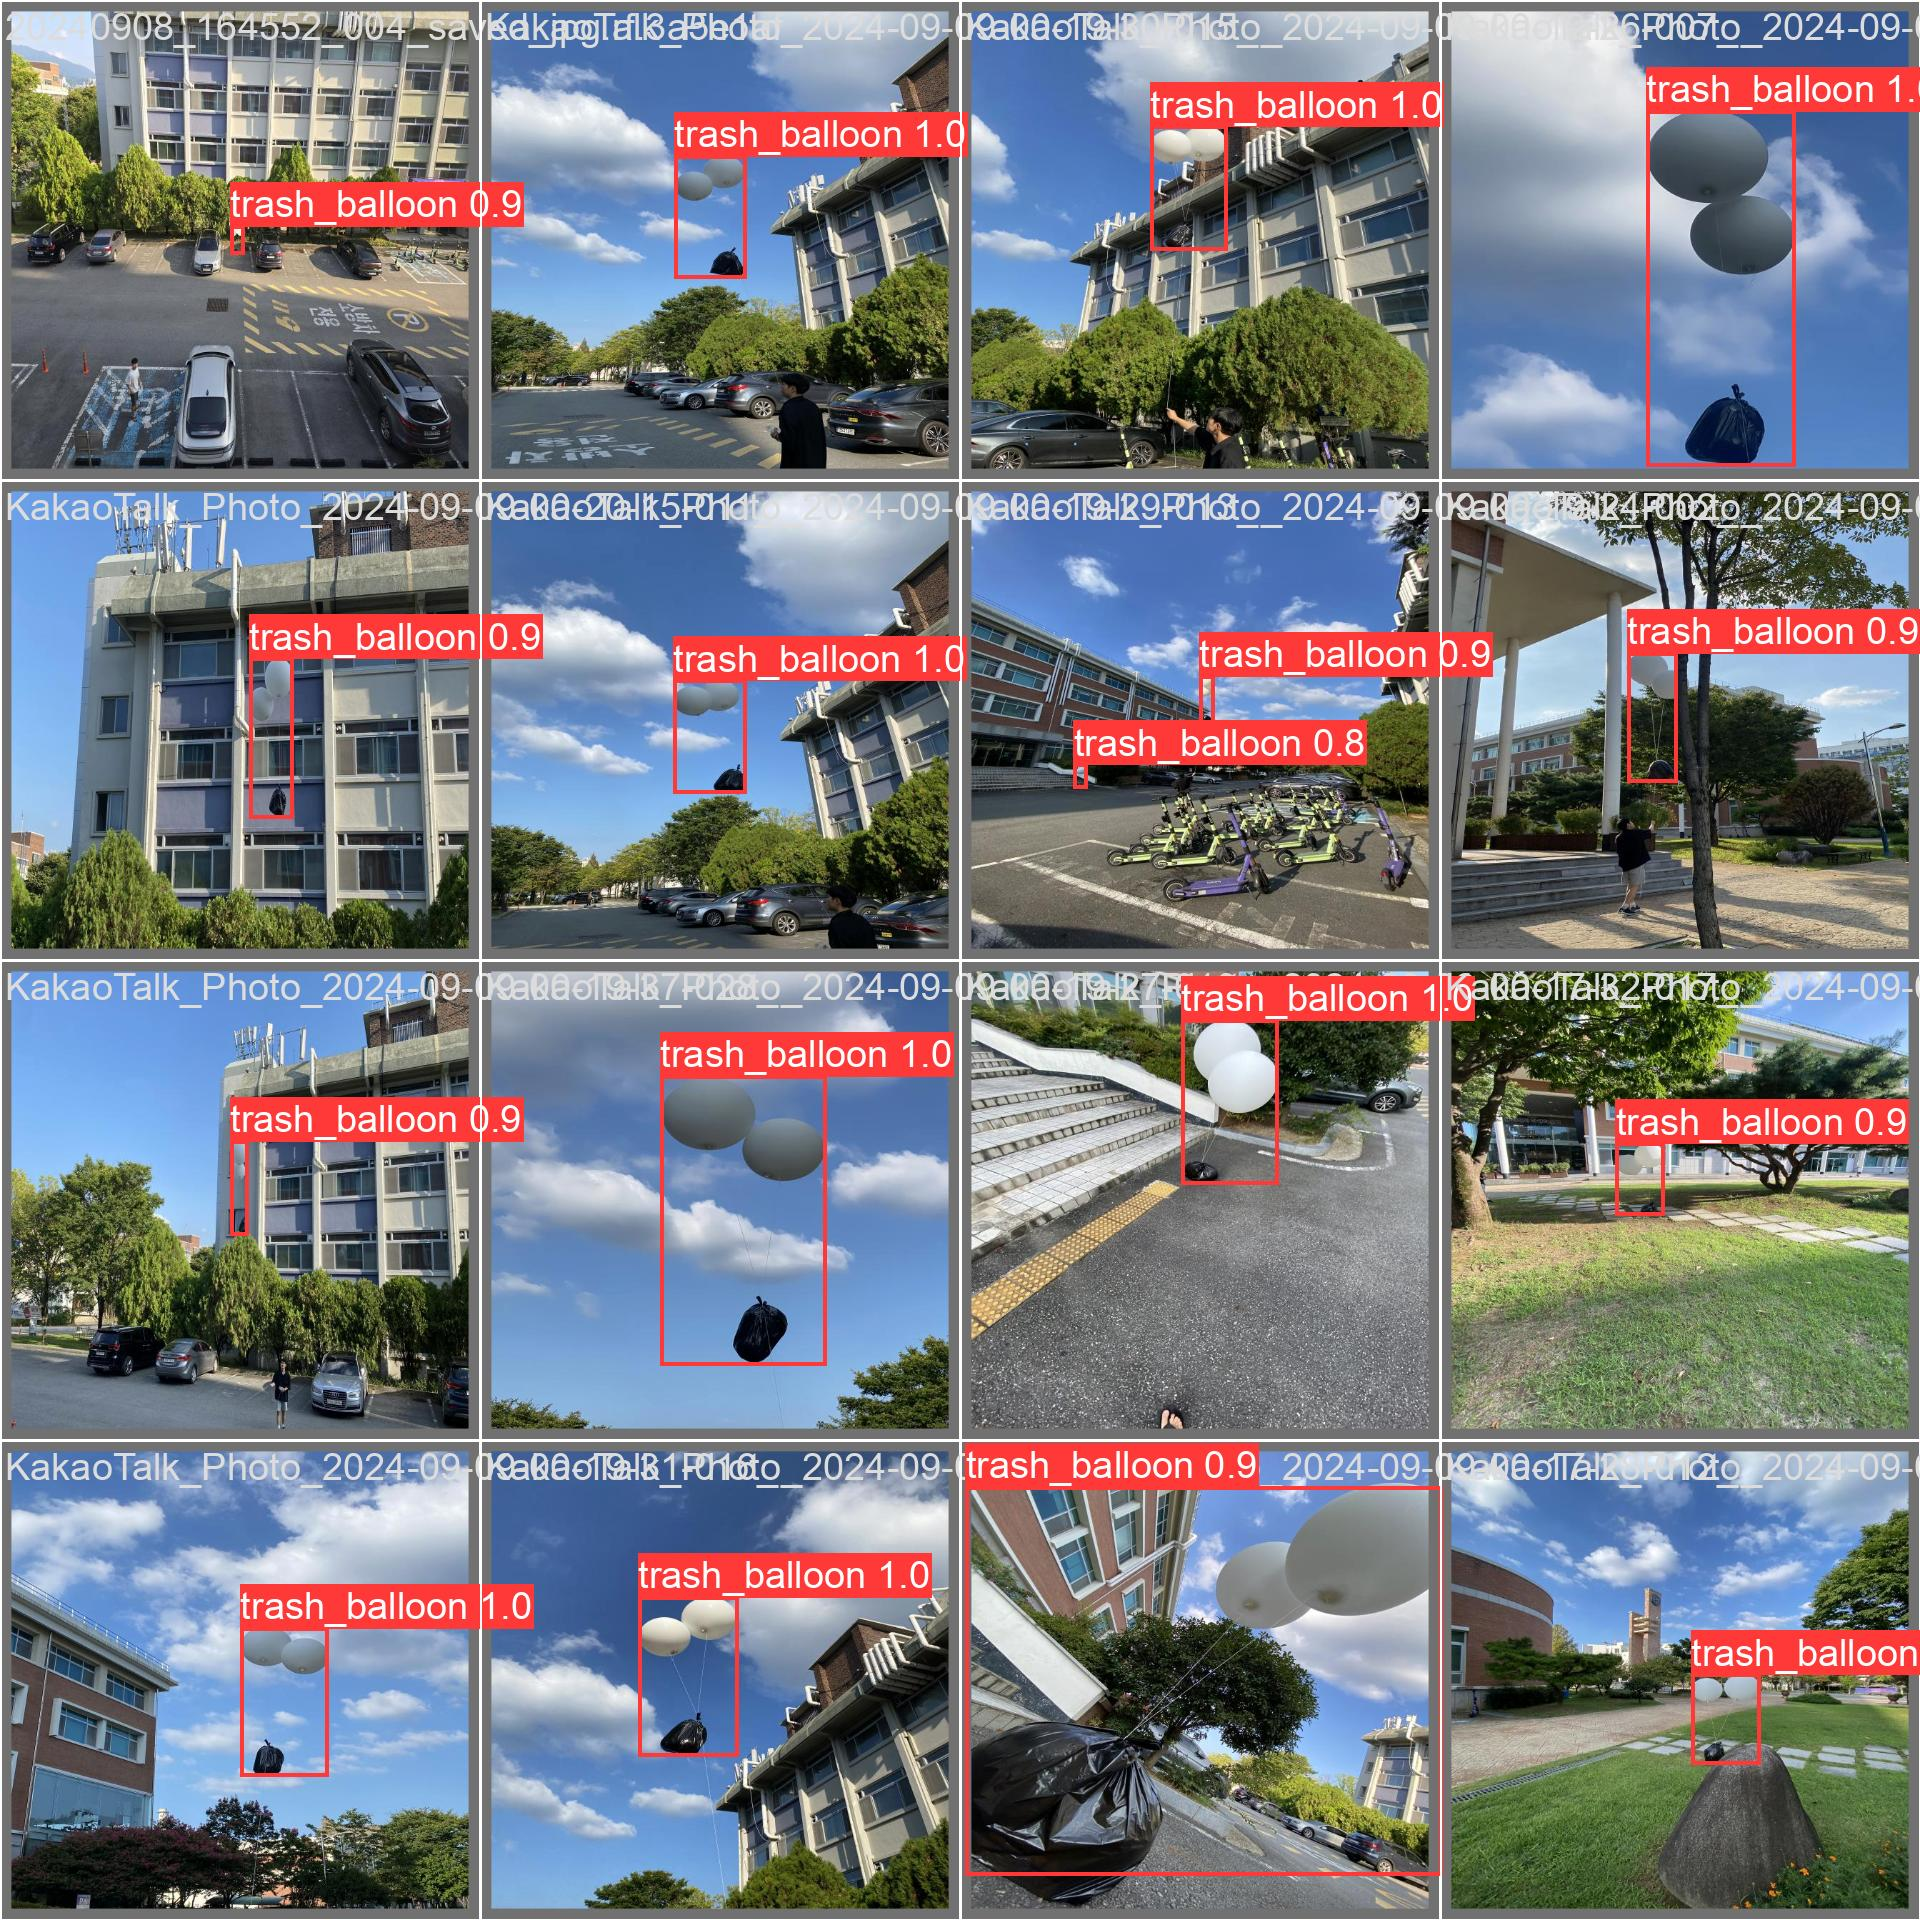

In [ ]:
# %cd {HOME}
Image(filename=f'{HOME}/yolov9/runs/train/exp7/val_batch0_pred.jpg', width=600) # 검증 데이터셋 예측

/content


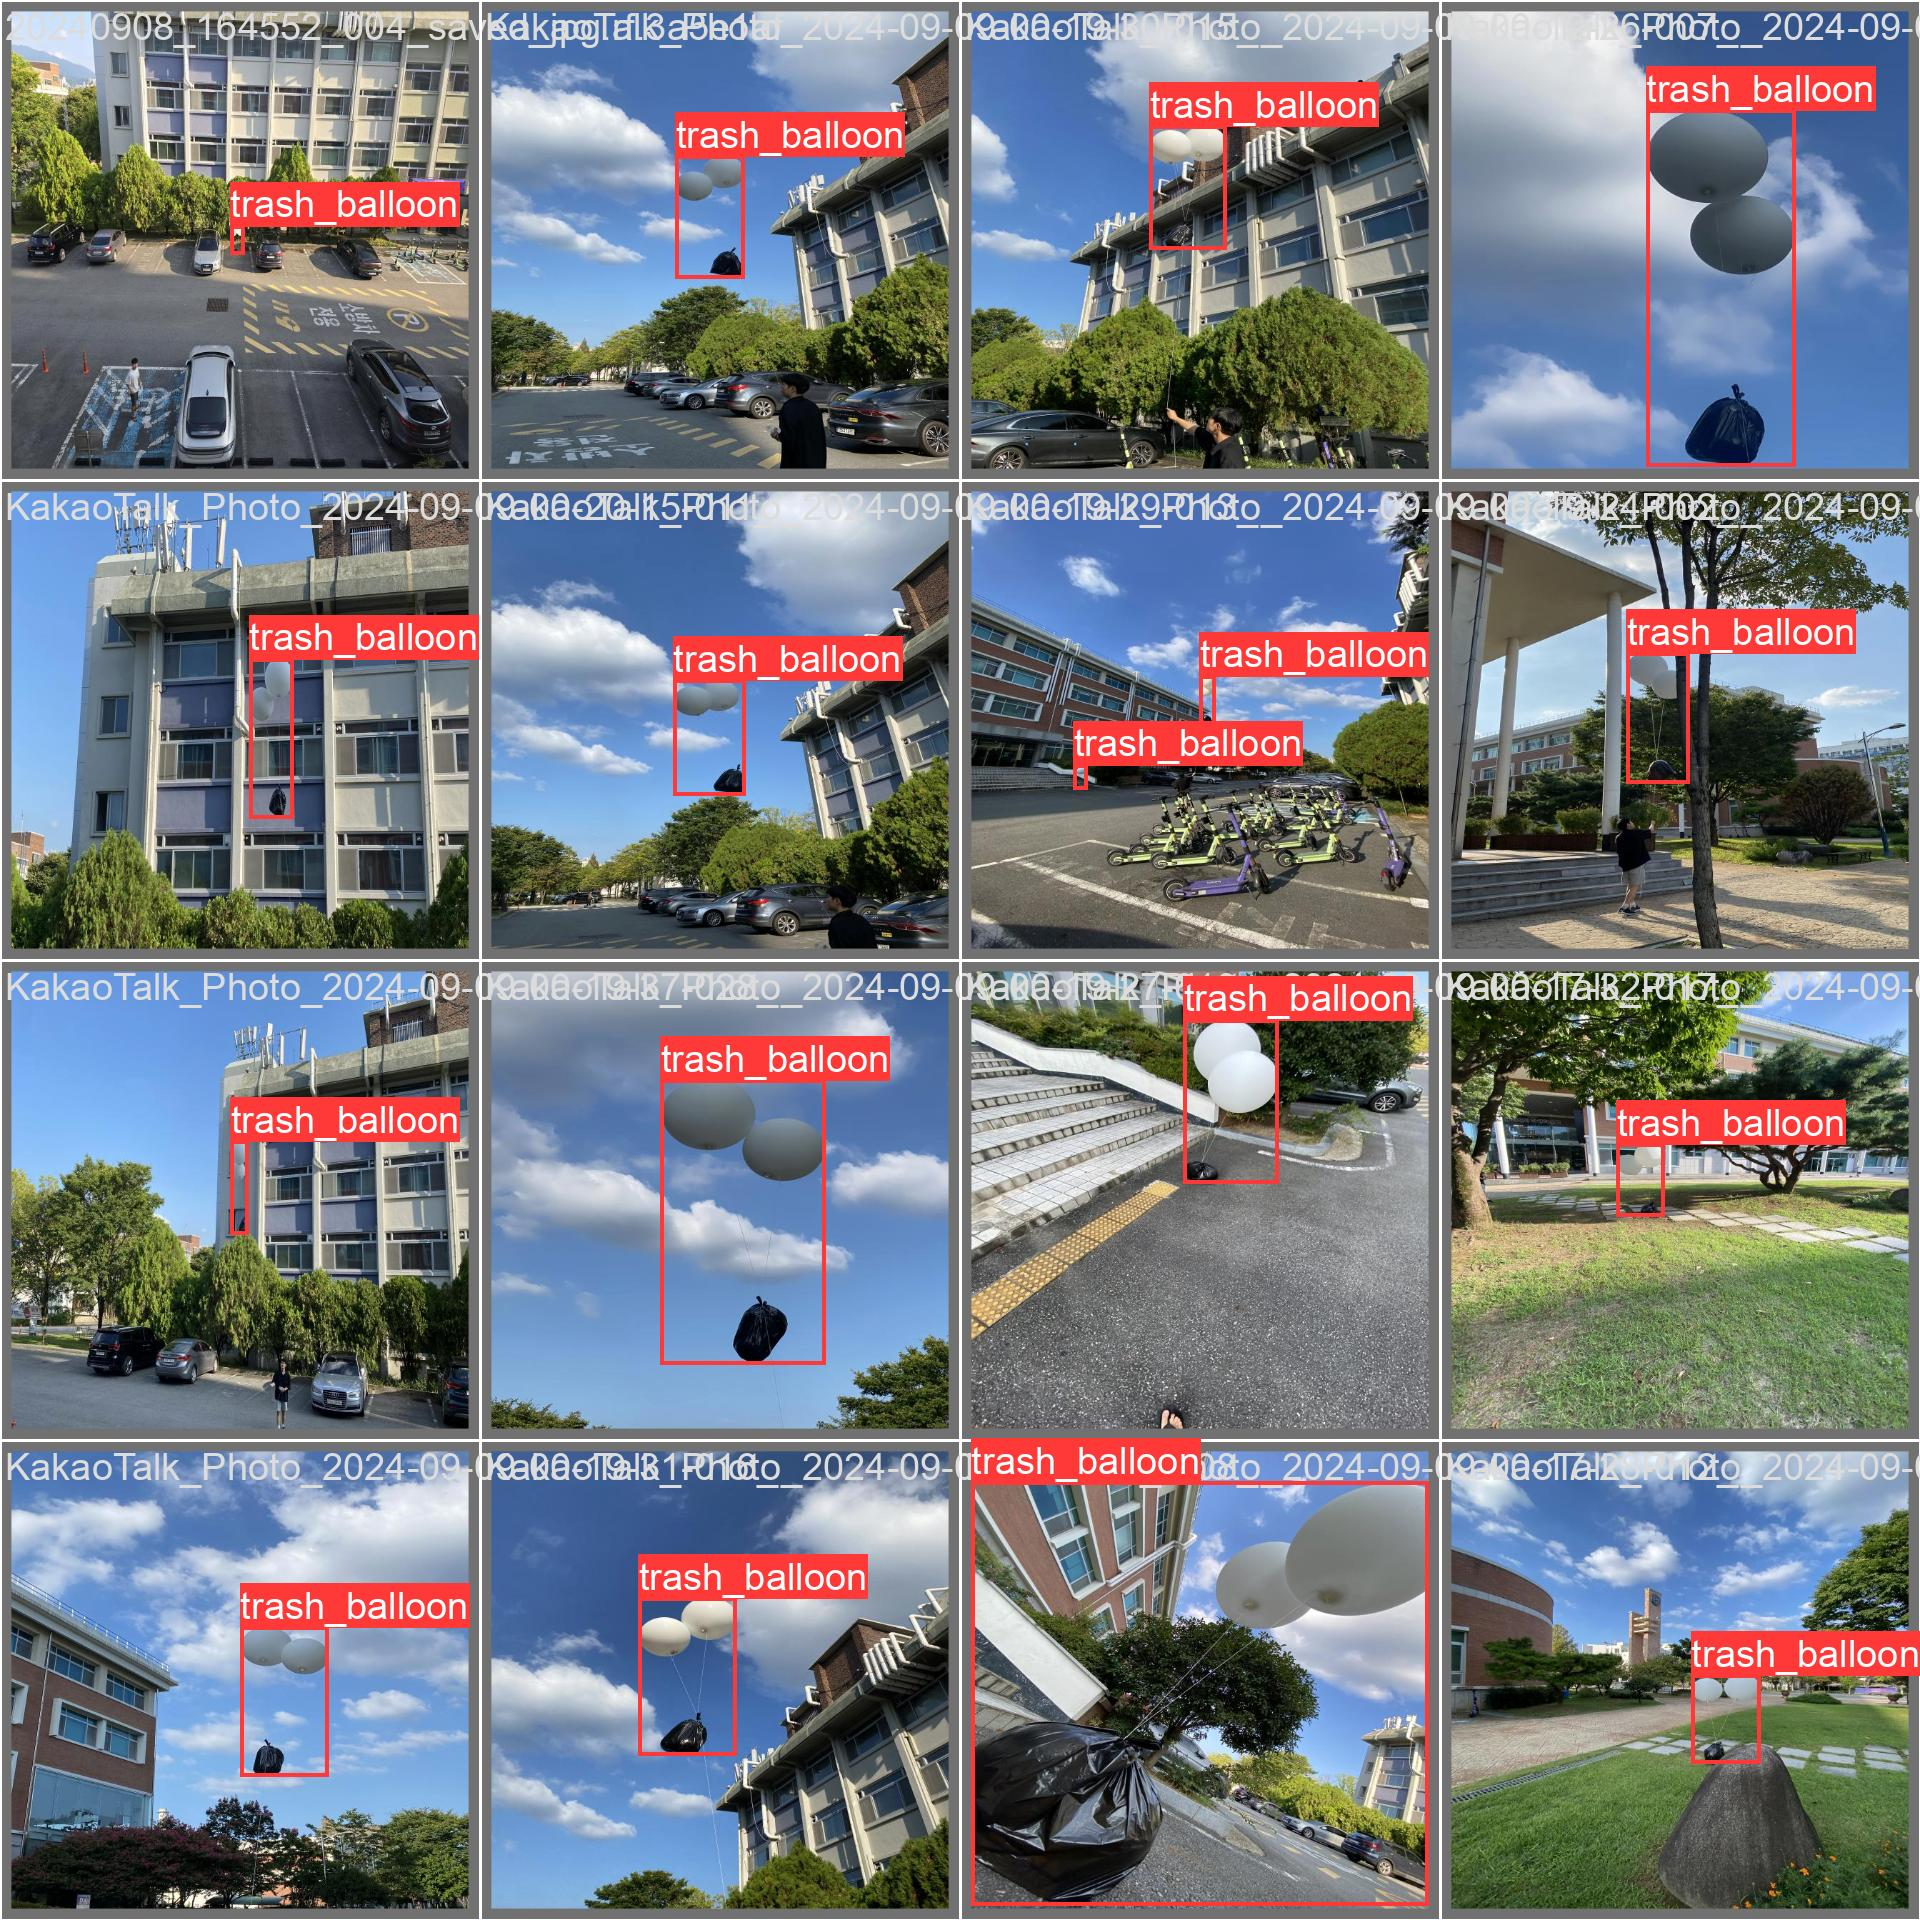

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/yolov9/runs/train/exp7/val_batch0_labels.jpg', width=600) # 검증 데이터셋 실제 라벨(데이터)

# 커스텀 모델 테스트

In [ ]:
# %cd {HOME}
# !yolo task=detect mode=predict model={HOME}/yolov9/runs/train/exp7/weights/best.pt conf=0.25 source=/content/Trash_Balloon_Detection_YOLO-1/test/images save=True

# YOLOv9을 사용한 예측 실행
!python yolov9/detect.py \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt \
--conf 0.25 \
--source /content/Trash_Balloon_Detection_YOLO-1/test/images \
--exist-ok

detect: weights=['/content/yolov9/runs/train/exp7/weights/best.pt'], source=/content/Trash_Balloon_Detection_YOLO-1/test/images, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

In [ ]:
# 이미지 파일 경로 설정
image_dir = '/content/yolov9/runs/detect/exp'
image_paths = glob.glob(os.path.join(image_dir, '*.jpg'))  # .jpg 파일을 모두 불러옵니다.

In [ ]:
# 한 행에 출력할 이미지 수
num_images_per_row = 4

# 총 이미지 개수
num_images = len(image_paths)

# 이미지 출력 (한 행에 4개씩)
for i in range(0, num_images, num_images_per_row):
    # 각 행에 해당하는 이미지 경로
    row_images = image_paths[i:i + num_images_per_row]

    # 한 행에 4개씩 플롯 생성
    fig, axes = plt.subplots(1, len(row_images), figsize=(20, 20))

    for ax, image_path in zip(axes, row_images):
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')  # 축 숨기기

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 커스텀 모델 훈련 관련 폴더 runs 폴더 저장 및 이미지 & 어노테이션 데이터 저장

In [ ]:
print(HOME)

/content


In [ ]:
# runs 폴더 압축하기
# shutil.make_archive('/yolov9/runs', 'zip', 'runs')

'/content/yolov9_runs.zip'

In [ ]:
# runs 디렉토리를 압축
shutil.make_archive('/content/yolov9_runs', 'zip', '/content/yolov9/runs')

'/content/yolov9_runs.zip'

In [ ]:
# 압축된 파일 다운로드
files.download('/content/yolov9_runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# runs/detect 디렉토리를 압축
shutil.make_archive('/content/yolov9/runs/detect', 'zip', '/content/yolov9/runs/detect')

'/content/yolov9/runs/detect.zip'